In [ ]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

In [ ]:
def fderiv(t,y,*params):
  theta, omega =y
  Fd,wd,q,l,g=params
  return [omega, -(g/l)*np.sin(theta) -q*omega + Fd*np.sin(wd*t)]

def solve_system(T0, TF, Y0, DT,params):
    sol = solve_ivp(fderiv, t_span=[T0, TF], y0=Y0, t_eval=np.arange(T0, TF+DT, DT),args=(params), method='RK23', max_step=0.04)
    
    y = sol.y[0]%(2*np.pi)
    mask = (np.pi <= y) & (y <= 2*np.pi)
    y[mask] -= 2*np.pi
    sol.y[0] = y

    return sol

In [ ]:
def solve_system2(T0, TF, Y0, DT,params):
    sol = solve_ivp(fderiv, t_span=[T0, TF], y0=Y0, t_eval=np.arange(T0, TF+DT, DT),args=(params), method='RK23', max_step=0.04)
    sol = sol%(2*np.pi)
    sol[(np.pi <= sol) & (sol <= 2*np.pi)] -= 2*np.pi
    return sol

In [ ]:
Fd=1.2
wd=2/3
q=1/2
g=9.8
l=9.8
params=[Fd,wd,q,g,l]

T0,TF = 0,10000
DT = 1e-1

T = np.arange(T0, TF+DT, DT)

CI = [0.2,0]
sol = solve_system(T0=T.min(), TF=T.max(), Y0= CI, DT=DT,params=[Fd,wd,q,g,l])

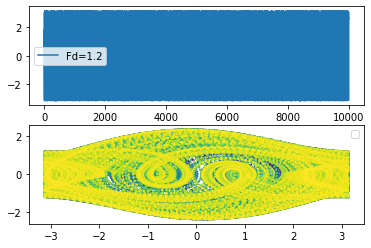

In [ ]:
fig, ax = plt.subplots(2, 1)

ax[0].plot(sol.t, sol.y[0], '-', label=f"Fd={Fd}")
ax[1].scatter(sol.y[0], sol.y[1], s=1.5, c=sol.t, cmap='viridis')

ax[0].legend()
ax[1].legend()

plt.show()

In [ ]:
def Poincare_Section(sol,a):

    mask= np.abs(sol.t%(a*np.pi/wd))<DT

    y_o = sol.y[0][mask]
    y_w = sol.y[1][mask]

    return y_o,y_w



In [ ]:
def MultiplePoincare(DT, sol, M, Data):
    
    for i in range(M):
        
        TF = np.power(10,i+1)
        Data[i][:] = Poincare_Section(0,TF , DT, sol, 2)

In [ ]:
y_o,y_w = Poincare_Section(sol,2)

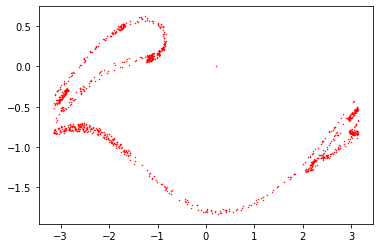

In [ ]:

fig,ax=plt.subplots()

plt.scatter(y_o,y_w,s=0.25, color = "red")

plt.savefig("frac.pdf")

In [ ]:
T0,TF = 0,1000000
DT = 1e-1

T = np.arange(T0, TF+DT, DT)

sol1 = solve_system(T0=T.min(), TF=T.max(), Y0= CI, DT=DT,params=[Fd,wd,q,g,l])

y_o1,y_w1 = Poincare_Section(sol1,2)

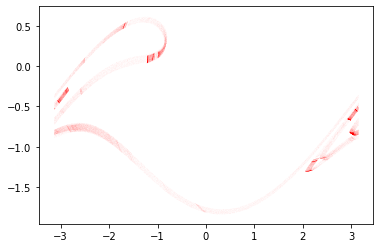

In [ ]:
fig,ax=plt.subplots()

plt.scatter(y_o1,y_w1,s=0.000005, color = "red")

plt.savefig("frac1.pdf")

In [ ]:
def graphs(N):

    fig, axs = plt.subplots(N, 10, figsize=(24,24), constrained_layout=True,
                        sharex=False, sharey=False)

    for nn, ax in enumerate(axs.flat):
        ax.plot(T, Y(nn + 1),"r")
        ax.set_title(f"E={nn+1}")